In [1]:
from Helpers import *

In [146]:
def f(x):
    C = np.array([-x[3]*(2*x[2]+x[3])*a2*np.sin(x[1]),x[2]*x[2]*a2*np.sin(x[1])])
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    theta = Minv@(-Bdyn@x[2:4]-C)
    return np.array([x[2],x[3],theta[0],theta[1]])
def g(x):
    Denominator = a3*(a1-a3)-a2*a2*np.cos(x[1])*np.cos(x[1])
    Minv = np.array([[a3/Denominator,(-a2*np.cos(x[1])-a3)/Denominator],[(-a2*np.cos(x[1])-a3)/Denominator,(2*a2*np.cos(x[1])+a1)/Denominator]])
    G = np.zeros((4,2))
    G[2:,] = Minv
    return G
def A(x,w):return np.array([[w,0,1,0],[0,w,0,1]])
def e(x,v,w):
    return A(x,w)@x+v

def fe(x,w):
    return A(x,w)@f(x)
def ge(x,w):return A(x,w)@g(x)
def Geinv(x,w):return np.linalg.inv(ge(x,w))
def u(edot,x,w):
    return (Geinv(x,w)@(edot-fe(x,w)))   


In [3]:
def ToCartesian(x):
    if len(x.shape) == 1 : 
        s = x[0]
        e = x[1]
    else : 
        s = x[:,0]
        e = x[:,1]
    X = np.cos(s+e)*33+np.cos(s)*30
    Y = np.sin(s+e)*33+np.sin(s)*30

    return X,Y

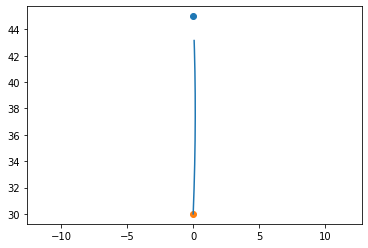

In [147]:
K = 2000
dt = .001
starting_point = [0,30]
targets = [0,45]
obj1,obj2 = newton(newtonf,newtondf,1e-8,1000,targets[0],targets[1]) #Defini les targets
st1,st2 = newton(newtonf,newtondf,1e-8,1000,starting_point[0],starting_point[1])

x = np.array([st1,st2,0.0,0.0])
w = 100
v = -np.array([obj1,obj2])*w
array_x = np.zeros((K,4))
array_x[0] = np.copy(x)
for i in range(K-1):
    edot = -e(x,v,w)#/np.linalg.norm(e(x,v,w),ord = 2)
    
    x += dt*(f(x)+(g(x)@u(edot,x,w)).reshape(4))
    array_x[i+1] = x
    #print(e(x,v,w))
X,Y = ToCartesian(array_x)
plt.plot(X,Y)
X,Y = ToCartesian(-v/w)
plt.scatter(X,Y)
X,Y = ToCartesian(np.array([st1,st2]))
plt.scatter(X,Y)
plt.axis("equal")
plt.show()

In [123]:
def RandomV():
    return np.random.uniform(0,3*pi/4,2)

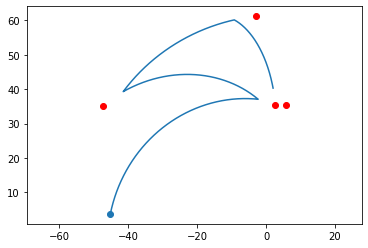

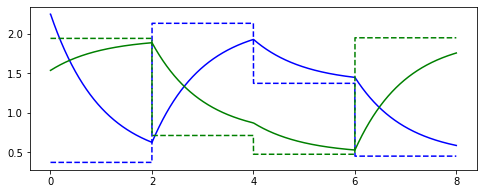

In [173]:
dt = .001
Tmax = 8
T = np.linspace(0,Tmax,int(Tmax/dt))

K = len(T)

st1,st2 = RandomV()
x = np.array([st1,st2,0.0,0.0])
w = 1e3

array_x = np.zeros((K,4))
array_V = np.zeros((K,2))
array_x[0] = np.copy(x)

for i in range(K-1):
    if i%(2/dt) == 0 : 
        v = RandomV()
        X,Y = ToCartesian(v)
        plt.scatter(X,Y,color = "red")
    edot = -e(x,v*-w,w)#/np.linalg.norm(e(x,v*-w,w),ord = inf)
    
    x += dt*(f(x)+(g(x)@u(edot,x,w)).reshape(4))
    array_x[i+1] = x
    array_V[i] = v
array_V[-1] = array_V[-2]
    
X,Y = ToCartesian(array_x)
plt.plot(X,Y)

X,Y = ToCartesian(np.array([st1,st2]))
plt.scatter(X,Y)
plt.axis("equal")
plt.show()

plt.figure(figsize = (8,3))
plt.xticks(np.linspace(0,Tmax,int(Tmax/2)+1))
COLORV = ["blue","green"]
COLORX = ["black","grey"]
for i in range(2):
    plt.plot(T,array_V[:,i],color = COLORV[i],linestyle = "--")
    plt.plot(T,array_x[:,i],color = COLORV[i])


